<a href="https://colab.research.google.com/github/MandeepJaura/AIProject/blob/main/ResearchProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing PyCaret

In [1]:
!pip install pycaret

     |████████████████████████████████| 288 kB 8.2 MB/s 
     |████████████████████████████████| 167 kB 57.1 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 261 kB 47.4 MB/s 
     |████████████████████████████████| 1.7 MB 41.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 53.3 MB/s 
     |████████████████████████████████| 2.0 MB 48.3 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 15.5 MB 43.9 MB/s 
     |████████████████████████████████| 6.8 MB 50.9 MB/s 
     |████████████████████████████████| 1.3 MB 47.5 MB/s 
     |████████████████████████████████| 62 kB 695 kB/s 
     |████████████████████████████████| 3.1 MB 43.8 MB/s 
     |████████████████████████████████| 10.1 MB 33.8 MB/s 
     |██████████████████

# To display interactive visuals

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Data Set Information: From UCI website 

For this project, we will use direct marketing campaigns of a Portuguese banking institution dataset from UCI website. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:


1.   bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2.   bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).





# Downloading Dataset in codelab

In [3]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -q bank-additional.zip

## **Reading Dataset using Pandas**

In [4]:
import pandas as pd
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=";")
df

age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]

In [5]:
df.shape

(41188, 21)

**order to demonstrate the predict_model() function** 
Some part of data set is taken out from data.

In [9]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37069, 21)
Unseen Data For Predictions: (4119, 21)


My intention is to have a realistic predictive model so I drop duration column. Please review attribute explanation for for duration field to have much deep insight of data set

# **Setting up the Environment in PyCaret**

The column duration and default are dropped from Dataset. As default feature does not affect dataset as we see before and for realistic predictive model, I drop duration column. Feature selection is on for selecting relevant feature for dataset

In [11]:
from pycaret.classification import *
exp_mclf101 = setup(data = df, target = 'y', session_id=123, numeric_features = ['previous'], feature_selection = True ) 

Description             Value
0                               session_id               123
1                                   Target                 y
2                              Target Type            Binary
3                            Label Encoded     no: 0, yes: 1
4                            Original Data       (41188, 21)
5                           Missing Values             False
6                         Numeric Features                10
7                     Categorical Features                10
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (28831, 57)
12                    Transformed Test Set       (12357, 57)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              dee8
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection              True
53                Feature Selection Method           classic
54            Features Selection Threshold               0.8
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

# **Comparing All Models**
This line of code will run through all different model to find out best model which work great on this dataset

In [12]:
best = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.9173  0.9459  0.5370  0.6643   
lightgbm  Light Gradient Boosting Machine    0.9157  0.9497  0.5481  0.6488   
rf               Random Forest Classifier    0.9120  0.9400  0.4593  0.6564   
lr                    Logistic Regression    0.9100  0.9305  0.4106  0.6610   
ada                  Ada Boost Classifier    0.9096  0.9369  0.4060  0.6602   
lda          Linear Discriminant Analysis    0.9096  0.9322  0.5108  0.6202   
ridge                    Ridge Classifier    0.9058  0.0000  0.3246  0.6688   
knn                K Neighbors Classifier    0.9053  0.8727  0.4861  0.5981   
et                 Extra Trees Classifier    0.9012  0.9148  0.3480  0.6064   
svm                   SVM - Linear Kernel    0.8922  0.0000  0.2941  0.6195   
dt               Decision Tree Classifier    0.8910  0.7309  0.5244  0.5162   
dummy                    Dummy Classifier    0.8875  0.5000  0.0000  0.0000   
nb                            Naive Bayes    0.8667  0.8341  0.4920  0.4215   
qda       Quadratic Discriminant Analysis    0.1839  0.5028  0.9143  0.1132   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.5935  0.5481  0.5521     4.220  
lightgbm  0.5939  0.5472  0.5498     0.446  
rf        0.5402  0.4932  0.5030     2.792  
lr        0.5063  0.4597  0.4757     3.296  
ada       0.5025  0.4559  0.4724     1.130  
lda       0.5599  0.5101  0.5133     0.303  
ridge     0.4367  0.3920  0.4229     0.054  
knn       0.5361  0.4840  0.4874     1.334  
et        0.4420  0.3922  0.4105     3.312  
svm       0.3349  0.2953  0.3393     1.299  
dt        0.5199  0.4585  0.4587     0.221  
dummy     0.0000  0.0000  0.0000     0.039  
nb        0.4539  0.3786  0.3801     0.055  
qda       0.2014  0.0015  0.0027     0.150

I will use these algorithm for analysis of dataset 

1. Gradient Boosting Classifier
2. Light Gradient Boosting Machine
3. Random Forest Classifier
4. Logistic Classifier 
5. Ada Boost Classifier	 



# **Create a Model**

**Gradient Boosting Classifier** 

In [17]:
gbc = create_model('gbc', fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9152  0.9449  0.5470  0.6455  0.5922  0.5452  0.5475
1       0.9147  0.9434  0.5185  0.6512  0.5773  0.5305  0.5348
2       0.9155  0.9464  0.5239  0.6564  0.5827  0.5364  0.5406
3       0.9174  0.9476  0.5223  0.6713  0.5875  0.5424  0.5477
4       0.9188  0.9474  0.5270  0.6799  0.5938  0.5495  0.5550
Mean    0.9163  0.9459  0.5277  0.6608  0.5867  0.5408  0.5451
SD      0.0016  0.0016  0.0100  0.0128  0.0061  0.0067  0.0069

 **Light Gradient Boosting Machine**

In [18]:
lightgbm = create_model('lightgbm', fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9149  0.9484  0.5578  0.6396  0.5959  0.5486  0.5502
1       0.9147  0.9466  0.5448  0.6418  0.5893  0.5421  0.5443
2       0.9138  0.9486  0.5408  0.6382  0.5855  0.5378  0.5400
3       0.9164  0.9530  0.5331  0.6590  0.5894  0.5435  0.5473
4       0.9183  0.9502  0.5670  0.6595  0.6098  0.5644  0.5665
Mean    0.9156  0.9494  0.5487  0.6476  0.5940  0.5473  0.5497
SD      0.0016  0.0021  0.0122  0.0096  0.0086  0.0093  0.0090

**Random Forest Classifier**

In [14]:
randomF = create_model('rf', fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9112  0.9401  0.4653  0.6467  0.5412  0.4935  0.5017
1       0.9098  0.9365  0.4228  0.6524  0.5131  0.4659  0.4792
2       0.9131  0.9372  0.4576  0.6659  0.5425  0.4963  0.5070
3       0.9180  0.9424  0.4761  0.6991  0.5665  0.5229  0.5347
4       0.9116  0.9391  0.4438  0.6590  0.5304  0.4836  0.4952
Mean    0.9127  0.9391  0.4531  0.6646  0.5387  0.4924  0.5036
SD      0.0028  0.0021  0.0185  0.0184  0.0174  0.0186  0.0182

**Logistic Classifier**

In [19]:
lr = create_model('lr', fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9091  0.9311  0.4099  0.6536  0.5038  0.4567  0.4717
1       0.9096  0.9264  0.3997  0.6624  0.4986  0.4522  0.4697
2       0.9083  0.9252  0.4191  0.6415  0.5070  0.4589  0.4715
3       0.9126  0.9358  0.4253  0.6781  0.5227  0.4774  0.4932
4       0.9098  0.9340  0.4006  0.6650  0.5000  0.4538  0.4714
Mean    0.9099  0.9305  0.4109  0.6601  0.5064  0.4598  0.4755
SD      0.0015  0.0041  0.0101  0.0122  0.0087  0.0091  0.0089

**Ada Boost Classifier**

In [15]:
abc = create_model('ada', fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9119  0.9372  0.4176  0.6758  0.5162  0.4707  0.4872
1       0.9069  0.9334  0.3889  0.6412  0.4841  0.4363  0.4528
2       0.9060  0.9341  0.3898  0.6341  0.4828  0.4343  0.4499
3       0.9109  0.9390  0.4145  0.6675  0.5114  0.4653  0.4813
4       0.9102  0.9414  0.4129  0.6617  0.5085  0.4620  0.4776
Mean    0.9092  0.9370  0.4047  0.6561  0.5006  0.4537  0.4698
SD      0.0023  0.0030  0.0127  0.0158  0.0142  0.0153  0.0154

# **Tune a Model**

**Gradient Boosting Classifier**

In [20]:
tune_gbc = tune_model(gbc)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9057  0.9339  0.5077  0.5957  0.5482  0.4959  0.4979
1       0.9174  0.9505  0.5432  0.6617  0.5966  0.5511  0.5545
2       0.9157  0.9428  0.5309  0.6540  0.5860  0.5397  0.5433
3       0.9126  0.9383  0.5216  0.6353  0.5729  0.5247  0.5279
4       0.9133  0.9451  0.5154  0.6423  0.5719  0.5243  0.5282
5       0.9077  0.9375  0.5062  0.6074  0.5522  0.5012  0.5038
6       0.9095  0.9362  0.5278  0.6129  0.5672  0.5169  0.5187
7       0.9143  0.9489  0.5262  0.6477  0.5806  0.5335  0.5371
8       0.9081  0.9384  0.5292  0.6056  0.5649  0.5137  0.5152
9       0.9192  0.9479  0.5231  0.6855  0.5934  0.5494  0.5556
Mean    0.9124  0.9419  0.5231  0.6348  0.5734  0.5251  0.5282
SD      0.0043  0.0056  0.0106  0.0274  0.0153  0.0178  0.0188

**Light Gradient Boosting Machine**

In [21]:
tune_lightgbm = tune_model(lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9126  0.9441  0.5446  0.6299  0.5842  0.5356  0.5374
1       0.9223  0.9545  0.5710  0.6852  0.6229  0.5800  0.5830
2       0.9150  0.9463  0.5278  0.6502  0.5826  0.5359  0.5395
3       0.9213  0.9486  0.5679  0.6790  0.6185  0.5750  0.5778
4       0.9147  0.9488  0.5093  0.6548  0.5729  0.5263  0.5315
5       0.9174  0.9470  0.5463  0.6604  0.5980  0.5524  0.5555
6       0.9143  0.9475  0.5154  0.6498  0.5749  0.5279  0.5323
7       0.9213  0.9577  0.5354  0.6960  0.6052  0.5623  0.5683
8       0.9161  0.9460  0.5600  0.6477  0.6007  0.5540  0.5559
9       0.9254  0.9555  0.5785  0.7068  0.6362  0.5951  0.5988
Mean    0.9180  0.9496  0.5456  0.6660  0.5996  0.5545  0.5580
SD      0.0040  0.0044  0.0225  0.0233  0.0203  0.0223  0.0222

**Random Forest Classifier**

In [22]:
tune_randomF = tune_model(randomF)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9057  0.9159  0.4738  0.6039  0.5310  0.4795  0.4838
1       0.9164  0.9403  0.5679  0.6456  0.6043  0.5578  0.5592
2       0.9077  0.9297  0.4630  0.6198  0.5300  0.4801  0.4864
3       0.9119  0.9257  0.5494  0.6224  0.5836  0.5346  0.5359
4       0.9133  0.9318  0.5278  0.6381  0.5777  0.5299  0.5328
5       0.9112  0.9209  0.5309  0.6232  0.5733  0.5241  0.5262
6       0.9109  0.9249  0.5525  0.6151  0.5821  0.5324  0.5333
7       0.9202  0.9350  0.6185  0.6547  0.6361  0.5913  0.5916
8       0.9147  0.9333  0.5354  0.6468  0.5859  0.5388  0.5418
9       0.9227  0.9416  0.6062  0.6747  0.6386  0.5954  0.5965
Mean    0.9135  0.9299  0.5425  0.6344  0.5843  0.5364  0.5387
SD      0.0050  0.0078  0.0470  0.0203  0.0346  0.0369  0.0354

**Logistic Classifier**

In [23]:
tune_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9019  0.9227  0.3846  0.6010  0.4690  0.4178  0.4305
1       0.9147  0.9394  0.4290  0.6950  0.5305  0.4865  0.5036
2       0.9036  0.9254  0.3735  0.6173  0.4654  0.4159  0.4318
3       0.9136  0.9294  0.4167  0.6923  0.5202  0.4760  0.4946
4       0.9081  0.9309  0.3920  0.6513  0.4894  0.4423  0.4596
5       0.9112  0.9217  0.4599  0.6478  0.5379  0.4903  0.4992
6       0.9050  0.9290  0.3951  0.6214  0.4830  0.4335  0.4470
7       0.9171  0.9430  0.4338  0.7194  0.5413  0.4988  0.5181
8       0.9109  0.9343  0.4154  0.6683  0.5123  0.4662  0.4822
9       0.9109  0.9373  0.4031  0.6753  0.5048  0.4592  0.4778
Mean    0.9097  0.9313  0.4103  0.6589  0.5054  0.4587  0.4744
SD      0.0047  0.0068  0.0246  0.0362  0.0263  0.0285  0.0293

**Ada Boost Classifier**

In [25]:
tune_abc = tune_model(abc)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9057  0.9330  0.3754  0.6387  0.4729  0.4249  0.4430
1       0.9154  0.9441  0.4043  0.7198  0.5178  0.4754  0.4992
2       0.9043  0.9366  0.3302  0.6446  0.4367  0.3903  0.4165
3       0.9122  0.9345  0.4043  0.6859  0.5087  0.4641  0.4837
4       0.9060  0.9389  0.3673  0.6432  0.4676  0.4202  0.4401
5       0.9046  0.9349  0.3827  0.6231  0.4742  0.4250  0.4403
6       0.9039  0.9350  0.3673  0.6230  0.4621  0.4132  0.4307
7       0.9185  0.9482  0.4154  0.7500  0.5347  0.4940  0.5200
8       0.9112  0.9409  0.4215  0.6683  0.5170  0.4708  0.4860
9       0.9119  0.9453  0.3938  0.6919  0.5020  0.4576  0.4795
Mean    0.9094  0.9391  0.3862  0.6689  0.4894  0.4436  0.4639
SD      0.0049  0.0050  0.0261  0.0404  0.0294  0.0315  0.0323

# Plot to see performance of different model
**For GBC Model**

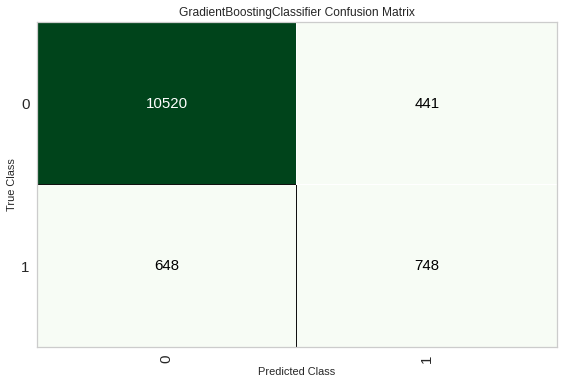

In [26]:
plot_model(tune_gbc, plot = 'confusion_matrix')

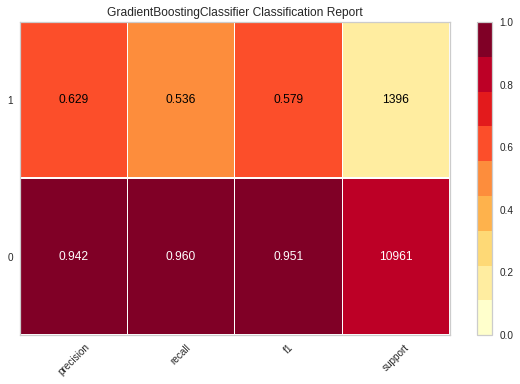

In [27]:
plot_model(tune_gbc, plot = 'class_report')

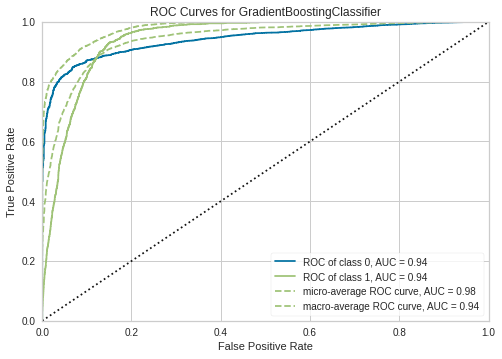

In [35]:
plot_model(tune_gbc, plot='auc')

In [29]:
predict_model(tune_gbc);

Model  Accuracy     AUC  ...      F1   Kappa    MCC
0  Gradient Boosting Classifier    0.9119  0.9424  ...  0.5787  0.5299  0.532

[1 rows x 8 columns]

**Performance plot for lightgbm**

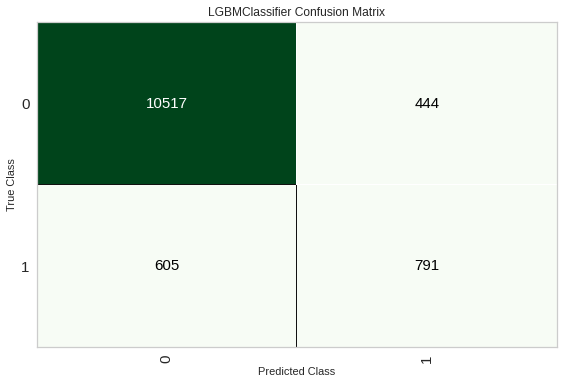

In [30]:
plot_model(tune_lightgbm, plot = 'confusion_matrix')

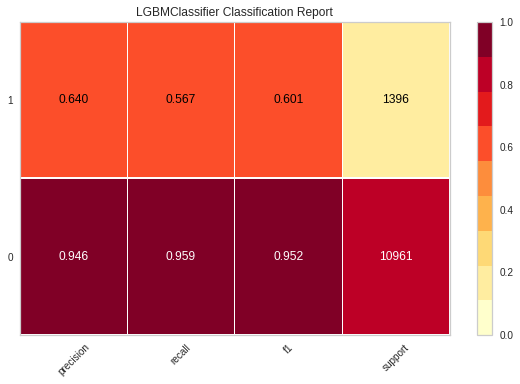

In [31]:
plot_model(tune_lightgbm, plot = 'class_report')

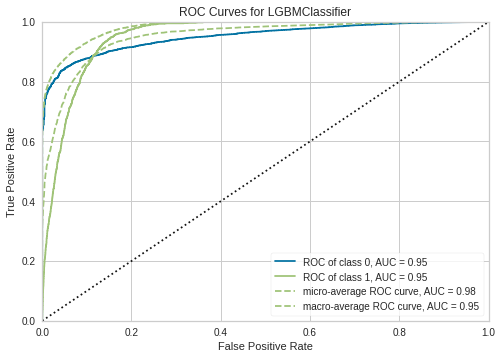

In [36]:
plot_model(tune_lightgbm, plot='auc')

In [33]:
predict_model(tune_lightgbm);

Model  Accuracy     AUC  ...      F1  Kappa     MCC
0  Light Gradient Boosting Machine    0.9151  0.9507  ...  0.6013  0.554  0.5553

[1 rows x 8 columns]

**Performance plot for Random forest**

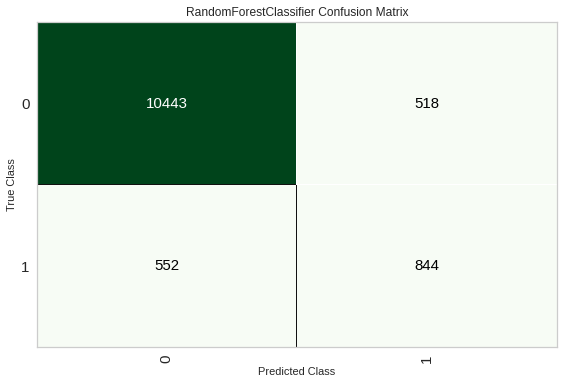

In [37]:
plot_model(tune_randomF, plot = 'confusion_matrix')

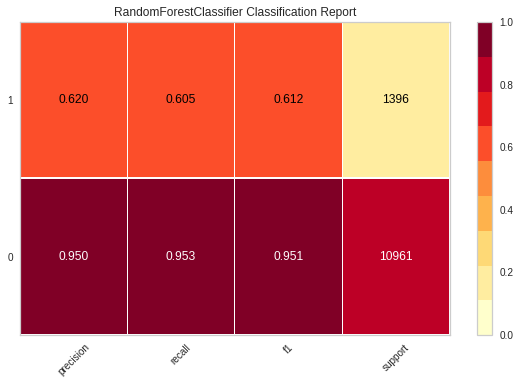

In [38]:
plot_model(tune_randomF, plot = 'class_report')

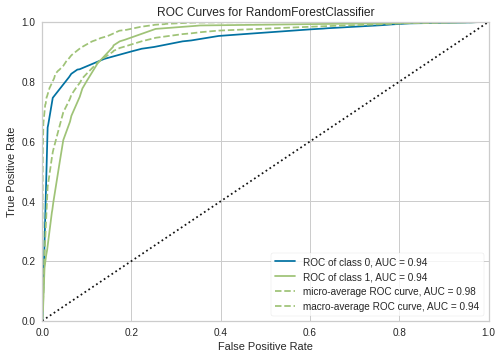

In [39]:
plot_model(tune_randomF, plot='auc')

In [44]:
predict_model(tune_randomF);

Model  Accuracy     AUC  ...     F1   Kappa     MCC
0  Random Forest Classifier    0.9134  0.9362  ...  0.612  0.5633  0.5634

[1 rows x 8 columns]

**Performance plot for Logistic Regressios**

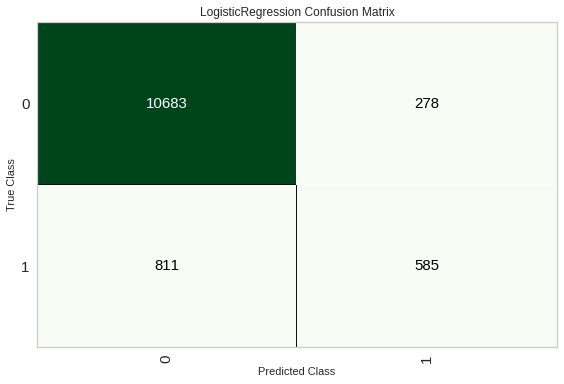

In [40]:
plot_model(tune_lr, plot = 'confusion_matrix')

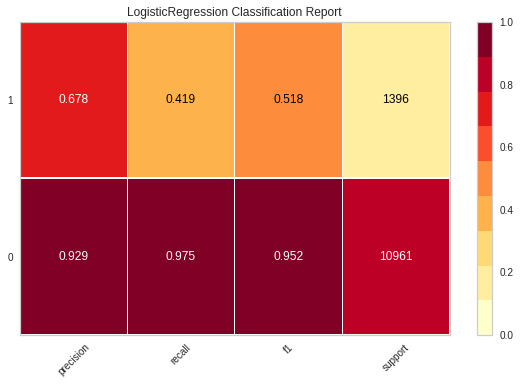

In [41]:
plot_model(tune_lr, plot = 'class_report')

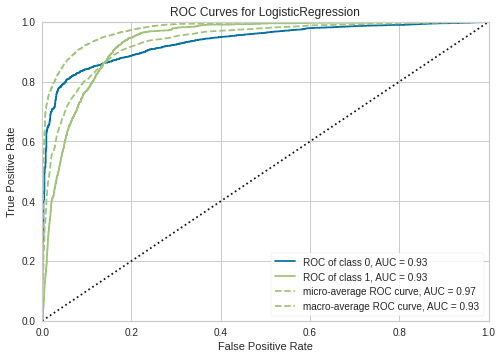

In [42]:
plot_model(tune_lr, plot = 'auc')

In [43]:
predict_model(tune_lr)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa    MCC
0  Logistic Regression    0.9119  0.9347  0.4191  0.6779  0.5179  0.4724  0.489

campaign  loan_yes  job_entrepreneur   age  ...  default_no   y  Label   Score
0           4.0       0.0               0.0  42.0  ...         1.0  no     no  0.9845
1           1.0       0.0               0.0  37.0  ...         1.0  no     no  0.8172
2           4.0       0.0               0.0  41.0  ...         0.0  no     no  0.9854
3           3.0       0.0               0.0  42.0  ...         0.0  no     no  0.9767
4           5.0       0.0               1.0  56.0  ...         1.0  no     no  0.9003
...         ...       ...               ...   ...  ...         ...  ..    ...     ...
12352       1.0       0.0               0.0  39.0  ...         0.0  no     no  0.9715
12353       6.0       0.0               0.0  23.0  ...         1.0  no     no  0.7317
12354       3.0       0.0               0.0  31.0  ...         1.0  no     no  0.8705
12355       2.0       0.0               0.0  26.0  ...         1.0  no     no  0.8905
12356       1.0       0.0               0.0  52.0  ...         1.0  no     no  0.9775

[12357 rows x 60 columns]

**Performance plot for Ada Boost Classifier**

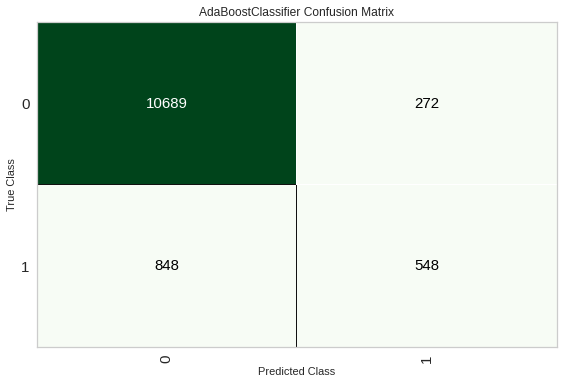

In [45]:
plot_model(tune_abc, plot = 'confusion_matrix')

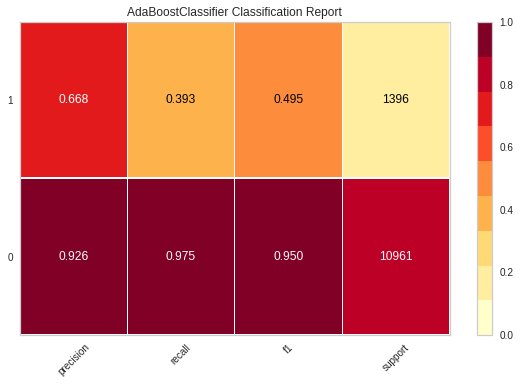

In [46]:
plot_model(tune_abc, plot = 'class_report')

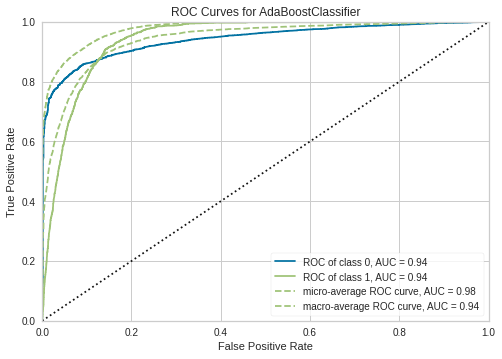

In [48]:
plot_model(tune_abc, plot = 'auc')

In [49]:
predict_model(tune_abc)

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Ada Boost Classifier    0.9094  0.9413  ...  0.4946  0.4485  0.4677

[1 rows x 8 columns]

campaign  loan_yes  job_entrepreneur   age  ...  default_no   y  Label   Score
0           4.0       0.0               0.0  42.0  ...         1.0  no     no  0.5256
1           1.0       0.0               0.0  37.0  ...         1.0  no     no  0.5146
2           4.0       0.0               0.0  41.0  ...         0.0  no     no  0.5225
3           3.0       0.0               0.0  42.0  ...         0.0  no     no  0.5257
4           5.0       0.0               1.0  56.0  ...         1.0  no     no  0.5129
...         ...       ...               ...   ...  ...         ...  ..    ...     ...
12352       1.0       0.0               0.0  39.0  ...         0.0  no     no  0.5186
12353       6.0       0.0               0.0  23.0  ...         1.0  no     no  0.5042
12354       3.0       0.0               0.0  31.0  ...         1.0  no     no  0.5125
12355       2.0       0.0               0.0  26.0  ...         1.0  no     no  0.5134
12356       1.0       0.0               0.0  52.0  ...         1.0  no     no  0.5386

[12357 rows x 60 columns]

# Finalize Model for Deployment

**I use predicted values of each algorithm to construct this table**

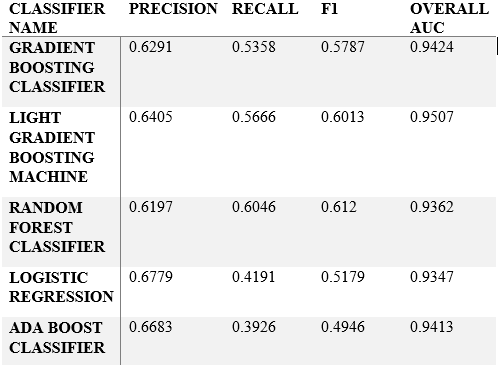


Based on this above table. The overall AUC(Area under the curve) value is larger for Light Gradient boosting Machine algorithm. As I use AUC matrix at first place for performance measurement, than think of other values such as percision, recall and F1 so based on their AUC value I feel that Light Gradient boosting Machine algorithm is most prominent for this dataset. The others value for this algorithm is also great. As this dataset is not balance. Therefore, AUC metric provide better insight to select best model for this dataset

In [51]:
final_lightgbm = finalize_model(tune_lightgbm)

In [53]:
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# Predict on unseen data

In [54]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

age          job  marital    education  ... nr.employed   y Label   Score
0   45     services  married     basic.9y  ...      5191.0  no    no  0.9987
1   29  blue-collar   single  high.school  ...      5191.0  no    no  0.9990
2   35  blue-collar  married     basic.6y  ...      5191.0  no    no  0.9988
3   39    housemaid  married     basic.4y  ...      5191.0  no    no  0.9971
4   55  blue-collar  married     basic.4y  ...      5191.0  no    no  0.9979

[5 rows x 23 columns]

# Saving the model

In [55]:
save_model(final_lightgbm,'Final lightgbm Model 09Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['previous'],
                                       target='y', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1,